In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.special as special
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score


In [175]:
df = pd.read_excel("df_limpio.xlsx")

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22735 entries, 0 to 22734
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   folio               22735 non-null  int64         
 1   tag                 22735 non-null  object        
 2   folio_solicitud     22735 non-null  int64         
 3   fecha               22735 non-null  datetime64[ns]
 4   marca               22735 non-null  object        
 5   modelo              22735 non-null  object        
 6   plazo               22735 non-null  object        
 7   precio              22735 non-null  float64       
 8   enganche            22735 non-null  float64       
 9   descuento           22735 non-null  float64       
 10  semana              22735 non-null  int64         
 11  monto_financiado    22735 non-null  float64       
 12  costo_total         22735 non-null  int64         
 13  monto_accesorios    22735 non-null  float64   

In [177]:
porc_eng = df.iloc[ : , [7,8,9,11,12,13,25,26,27,30,33,29]]

In [178]:
porc_eng2 = porc_eng[(porc_eng["puntos"] > 0) & (porc_eng["monto_financiado"]>0)& (porc_eng["score_buro"]>0) & (porc_eng["edad_cliente"]>0)]
porc_eng2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1863 entries, 7235 to 21182
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   precio            1863 non-null   float64
 1   enganche          1863 non-null   float64
 2   descuento         1863 non-null   float64
 3   monto_financiado  1863 non-null   float64
 4   costo_total       1863 non-null   int64  
 5   monto_accesorios  1863 non-null   float64
 6   puntos            1863 non-null   int64  
 7   riesgo            1863 non-null   float64
 8   score_buro        1863 non-null   int64  
 9   limite_credito    1863 non-null   int64  
 10  edad_cliente      1863 non-null   float64
 11  porc_eng          1863 non-null   float64
dtypes: float64(8), int64(4)
memory usage: 189.2 KB


**PORC_ENG**

c:\Users\Carlos Casillas\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


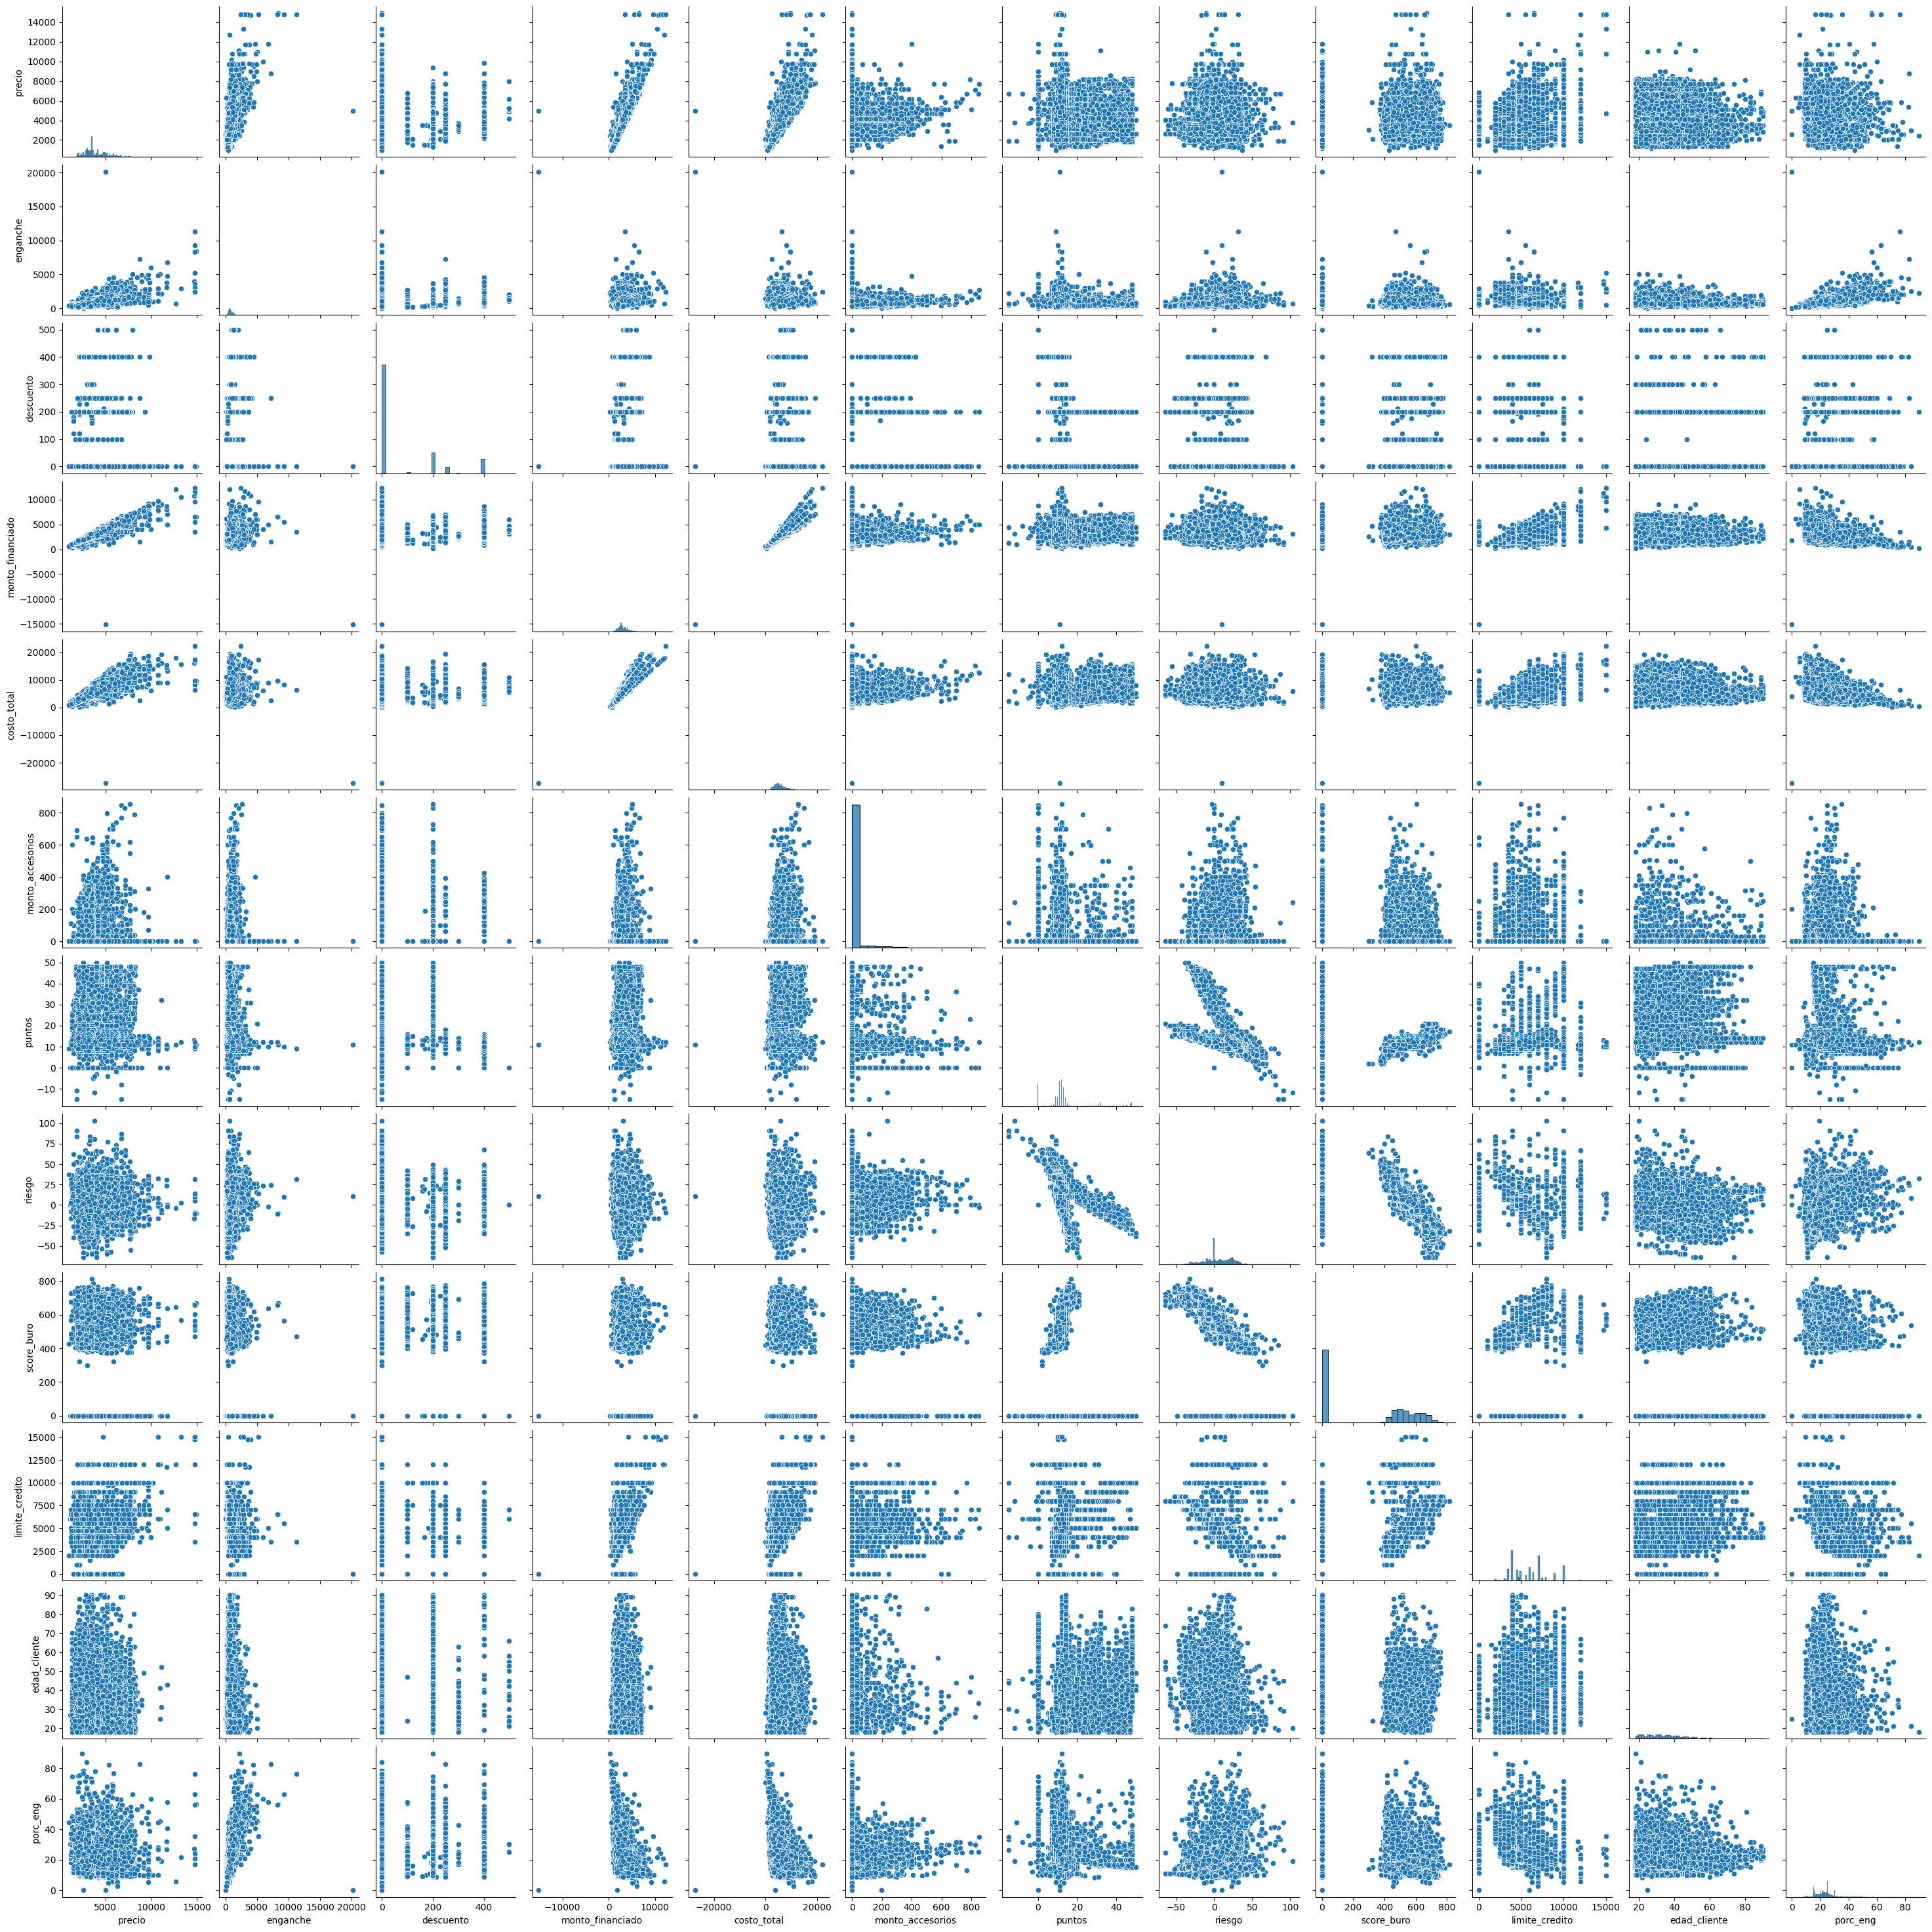

In [179]:
sns.pairplot(porc_eng)


In [180]:
x= porc_eng2[['edad_cliente']]
y= porc_eng2['porc_eng']

**Porcentaje de enganche vs edad**

In [181]:
#Modelo cuadrático
def  func1 (x, a, b, c):
     return a*x**2 + b*x + c
     

In [182]:
parametros, covs= curve_fit(func1, porc_eng2['edad_cliente'], porc_eng2['porc_eng'])


In [183]:
parametros

array([ 1.39485462e-03, -1.64200270e-01,  2.66698394e+01])

In [184]:
parametros, _ = curve_fit(func1, porc_eng2['edad_cliente'], porc_eng2['porc_eng'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a * x ** 2 + b * x + c

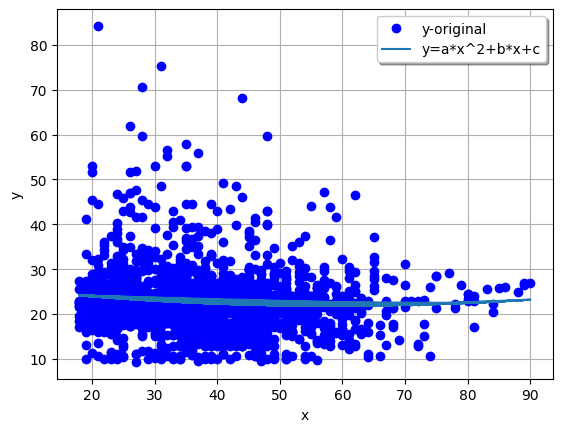

In [185]:
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="y=a*x^2+b*x+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [186]:
R2 = r2_score(y, yfit1) 
R2

0.008212772014390746

In [187]:
#Modelo exponencial
def funcion_exponencial (x, a, b, c):
    return a * np.exp(b * x) + c

In [188]:
parametros2, covs2= curve_fit(funcion_exponencial, porc_eng2['edad_cliente'], porc_eng2['porc_eng'])


In [189]:
parametros2, _ = curve_fit(funcion_exponencial, porc_eng2['edad_cliente'], porc_eng2['porc_eng'])
a2, b2, c2 = parametros2[ 0 ], parametros2[ 1 ], parametros2[ 2 ]
yfit2 = a2 * np.exp(b2*x)  +c2

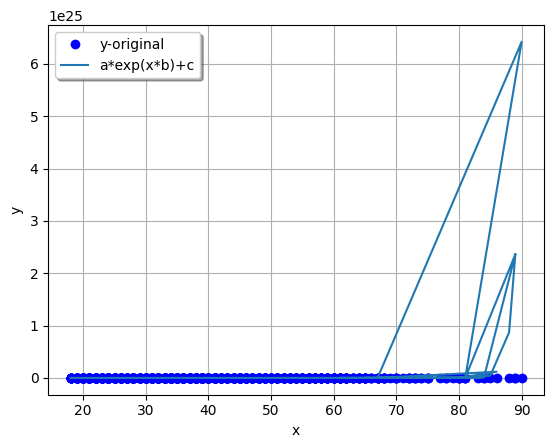

In [190]:
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit2, label="a*exp(x*b)+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [191]:
R2 = r2_score(y, yfit2) 
R2

-5.488694968873556e+46

In [192]:
#Modelo inverso
def funcion_inversa (x, a):
    return 1/a*x

In [193]:
parametros3, covs3= curve_fit(funcion_inversa, porc_eng2['edad_cliente'], porc_eng2['porc_eng'])


In [194]:
parametros3, _ = curve_fit(funcion_inversa, porc_eng2['edad_cliente'], porc_eng2['porc_eng'])
a3 = parametros3[0]
yfit3 = 1/a*x

In [195]:
R2 = r2_score(y, yfit3) 
R2

-15809795.131640822

**Porcecntaje de enganche vs riesgo**

In [196]:
porc_eng3 = porc_eng[(porc_eng["puntos"] > 0) & (porc_eng["monto_financiado"]>0)& (porc_eng["score_buro"]>0)]
porc_eng3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11878 entries, 7235 to 22733
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   precio            11878 non-null  float64
 1   enganche          11878 non-null  float64
 2   descuento         11878 non-null  float64
 3   monto_financiado  11878 non-null  float64
 4   costo_total       11878 non-null  int64  
 5   monto_accesorios  11878 non-null  float64
 6   puntos            11878 non-null  int64  
 7   riesgo            11878 non-null  float64
 8   score_buro        11878 non-null  int64  
 9   limite_credito    11878 non-null  int64  
 10  edad_cliente      1863 non-null   float64
 11  porc_eng          11878 non-null  float64
dtypes: float64(8), int64(4)
memory usage: 1.2 MB


In [197]:
x= porc_eng['riesgo']
y= porc_eng['porc_eng']

In [198]:
parametros4, covs4= curve_fit(func1, porc_eng['riesgo'], porc_eng['porc_eng'])


In [199]:
parametros4, _ = curve_fit(func1, porc_eng['riesgo'], porc_eng['porc_eng'])
a4, b4, c4 = parametros4[ 0 ], parametros4[ 1 ], parametros4[ 2 ]
yfit4 = a4 * x ** 2 + b4 * x + c4

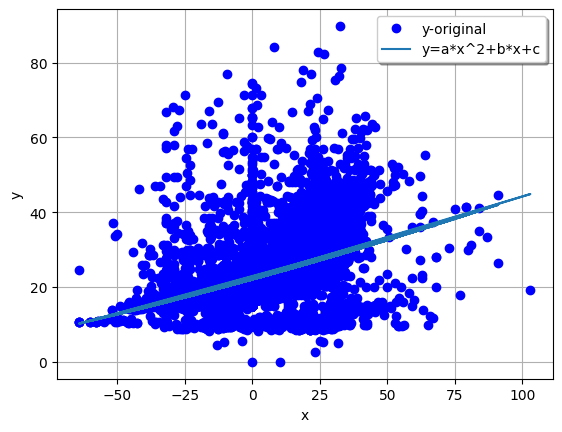

In [200]:
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit4, label="y=a*x^2+b*x+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [201]:
R2 = r2_score(y, yfit4) 
R2

0.25256826327602144

In [202]:
#Exponencial
parametros5, covs5= curve_fit(funcion_exponencial, porc_eng['riesgo'], porc_eng['porc_eng'])



In [203]:
parametros5, _ = curve_fit(funcion_exponencial, porc_eng['riesgo'], porc_eng['porc_eng'])
a5, b5, c5 = parametros5[ 0 ], parametros5[ 1 ], parametros5[ 2 ]
yfit5 = a5 * np.exp(b5*x)  +c5

In [204]:
R2 = r2_score(y, yfit5) 
R2

-3.369117093406587e+54